# **Object Tracking by Using GOTURN**

Author: De Brouchoven de Bergeyck, Aymar

Author: Zhong, Yigen

# 1. Introduction & Motivation


Visual object tracking is an important research direction in computer vision, and it has a wide range of applications, such as video surveillance, human-computer interaction, unmanned driving, etc. Comparing with many other compute visual missions, for example, object detection, they have a lot of differences. Firstly, object detection can not detect every object in the world, where the task setting of the detector at the beginning is essentially different from that of the tracker. Therefore, even if the two can be replaced under certain circumstances, the replacement can only be a temporary strategy, where there are still many mismatches in the task of detection and tracking. In essence, the tracker can fully consider the Spatio-temporal information, making it more suitable for the task of tracking any target in the video. Therefore, the research on tracking tasks is not only limited to tracking an object in a video, but also includes how to model context, how to make better use of spatiotemporal information, how to express target model, how to update target model with time, and so on. In short, target tracking is to establish the position relation of the object to be tracked in a continuous video sequence, and get the complete motion track of the object.

In the past two or three decades, visual object tracking technology has made great progress, especially in the past few years, the object tracking method based on deep learning has achieved satisfactory results, which makes a breakthrough in object tracking technology. In this blog, we are going to introduce, reproduce and have an in-depth investigation of one of the most famous object tracking papers, Learning to Track at 100 FPS with Deep Regression Networks (Held, Thrun & Savarese, 2016). In this section, the motivation and introduction of object tracking are discussed. In Section 2, we mainly discuss the architecture of the paper (Held et al., 2016). Furthermore, Aymar also does the reproduction work and replaces the pre-trained network of the original paper with the latest pre-trained network, and compares their performance with the original one in Section 3. In Section 4, Yigen focuses on the influence of different loss functions for object tracking on neural networks. In Section 5, Yigen proposes a possible draft solution of combining the Kalman filter and Goturn neural network. In Section 6, we combine the relatively good loss functions and the pre-trained networks to see their combination performance. In Section 7, we give our video about this blog. In Section 8, the conclusion is given.

# 2. Architecture

In this section the architecture and the functionning of the original model is explained. 
The goal of the network is to have as input the frames of a video, and after processing, it will output the location of the tracked object for each frame. The network will try to learn a relationship between appearance and motion. 

The network consists of two parrallel channels of 5 convolutional layers each, which are the 5 pretrained convolutional layers of AlexNet. They take as input the current (t) frame from whome we want to find it's bounding box and it's frame just before (t-1). Their output is a set of features that capture a high-level representation of the image. Then the outputs of the convolutional layers are concatenated and resized before passing through 3 fully connected layers. Their role is to compare the features from the target object to the features of the target object in the previous frame with the features of the target frame in the current frame. Finally the output consists of 4 values which represent the output bounding box of the current frame. 

When there are multiple objects on a frame, the model should receive some prior knowledge about what object to track. This is done by cropping the image around the tracked object and by adding some padding around the crop to give some contextual information. The current (t) and previous (t-1) frames are both cropped around the same coordinates at timestep (t-1). When testing the first image is being cropped around it's ground-truth bounding box. Then at each following timestep, the frame at time t is being cropped around the predicted bounding box of the previous frame (t-1). This allows good results when the bounding box is well located. But when the boudnign box looses the track of the object, there is no way, appart of randomly, to find the object back again. This is one of the major drawbacks of this method. Then another drawback is that when the motions are too big and too fast, the object might not find itself anymore in the next cropped frame. 



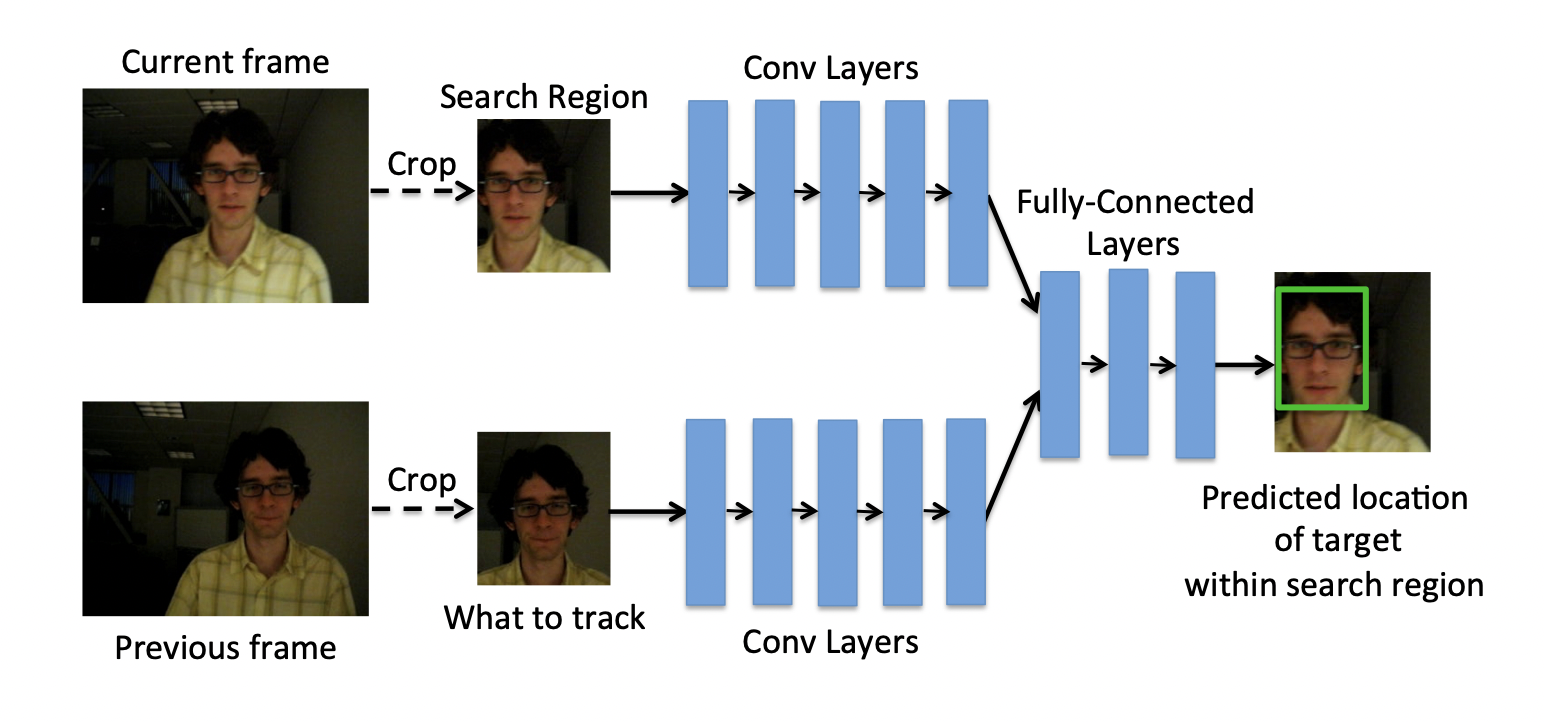

# 3. Pretrained architectures



In this section we tried different backbone architecture to do feature extraction. We tried to deeply understand our results and we tried to explain them, sometimes it may look like speculative explanations because we aren't sure about all the explanations. The backbone architecture is a very important part of the paper's architecture because the linear layers entirely rely on the features that are extracted. We found a backbone architecture that obtains much better results that the original paper's results. 

One of the important things to notice with the paper is that it is written in 2016. Since then the computer vision field has improved a lot. [List of network accuracies](https://pytorch.org/vision/stable/models.html). The network accuracies represent the Acc@5. The AlexNet has been released in 2012 with a poor accuracy of 79. Then the VGG-16 was proposed in 2014 with an much better results namely 90. The ResNet architecture was resleased in 2015 by Microsoft has accuracies going from 89 till 94. In 2018, the MobileNetV2 reached 90 and the Mnasnet0_5 reached 87. All those networks have different ways of functionning, advantages and disadvantages. For example for the 3 first architectures, the focus was namely on having the best possible result on classification tasks. The MobileNet and MnasNet wanted to be integrated on mobile devices, they have then to be fast and small, while obtaining the best possible classification accuracies.

Several results were compared. The first one is the accuracy of the tracking, the IoU metric is used to compare the predicted bounding box with the ground truth one. And then an average of the IoU of the different frames is taken to make a comparison. A drawback of doing it like that is when the model looses the track of the object, it is then not possible anymore, only by chance, to get back to track the object again. This is why another metric is used to measure the quality of the fit, when it is actually tracking. This metric only averages the IoU of the frames that don't have a zero IoU. Both those metrics aren't very representative of the actual perfomances of the model, once they  loose track of the object. 

A second compared result was the speed at which the models were able to output a bounding box. Object tracking is used on videos, the difficult thing is to do object tracking in real time, and depending on the amount of frames per second the difficulty can increase significantly. The computation time per frame is measured approximately on a few tests. 

The following architectures have been trained on the ALOV300++ dataset, it is a 10GB dataset. It comprises 315 short videos of average 9 seconds, which in total represent 89364 annotated frames. The videos are mostly taken from youtube and are of 64 different types. 

The tests have been performed on the first 16 classes of the OTB dataset, version 2013.
The following tests and training have been done on Google Colab PRO. We unfortunately noticed to late, that saving the amount of epochs of training we did for each model, would be usefull. For future research we will pay attention to it. 






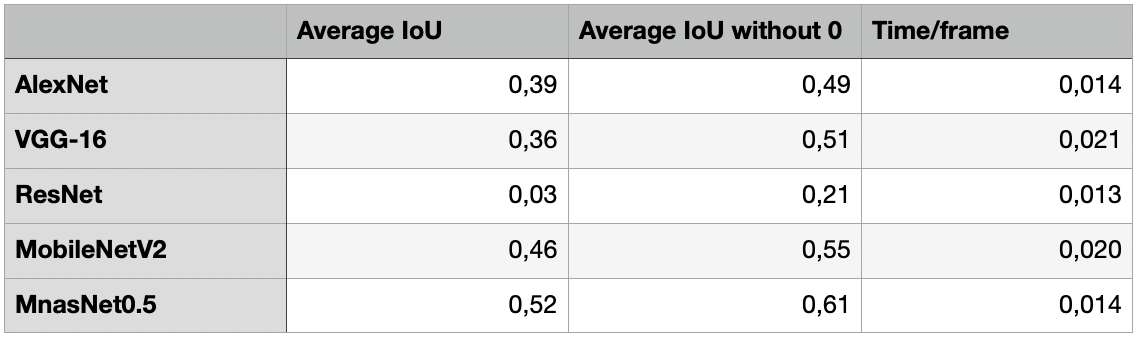

The results are being presented in the table above. First of all, the network with Mnasnet0.5 as backbone has the best performance in tracking accuracy. A second thing to notice is that the Resnet's, suprisingly, aren't performing well at all. And finally, the fastest working network is the one that uses the AlexNet, even if Alexnet is known as a very slow image classifier. The results are going to be discussed in the sections below. 


---
### AlexNET
Firstly the results of the original paper are discussed. The original paper uses the pretrained **AlexNET**, in order to do feature extraction. For these tests the trained model of the paper is used. It has been trained on the ALOV300++ and the ILSVRC2014_DET_train dataset. The other models, discussed below, have only been trained on the ALOV300 since the other one was too heavy to manage (47GB). The output size of the alexnet is 256 * 6 * 6, after the max pooling layer. The test results were the following:


*   Accuracy : 0,39
*   Accuracy with non-zero IoU: 0,49
*   Exectution time : 0.014 second/frame

Usually in the litterature it is assumed that object tracking performances are correctly tracking the image when the IoU is greater than 0.5, this means that the tracking performances are not exceptionnal compared to the state of the art. A second point to notice is that the paper claims it is capable to analyse 100 FPS, which isn't the case when we tested it, we obtained 71.4 FPS. The GPU that the paper used is a GTX 680 and the one Google Colab PRO used is a Tesla P100-PCIE-16GB. The Google colab's GPU should in theory be faster than the paper's GPU, this means the difference in GPU isn't be a reason for the difference. Another possibility is that google colab may loose some time when accessing it's memory. Or the difference may be due to the difference in dataset used, the paper used the videos of the VOT 2014 tracking challenge and we used the OTB version 2013 dataset. 


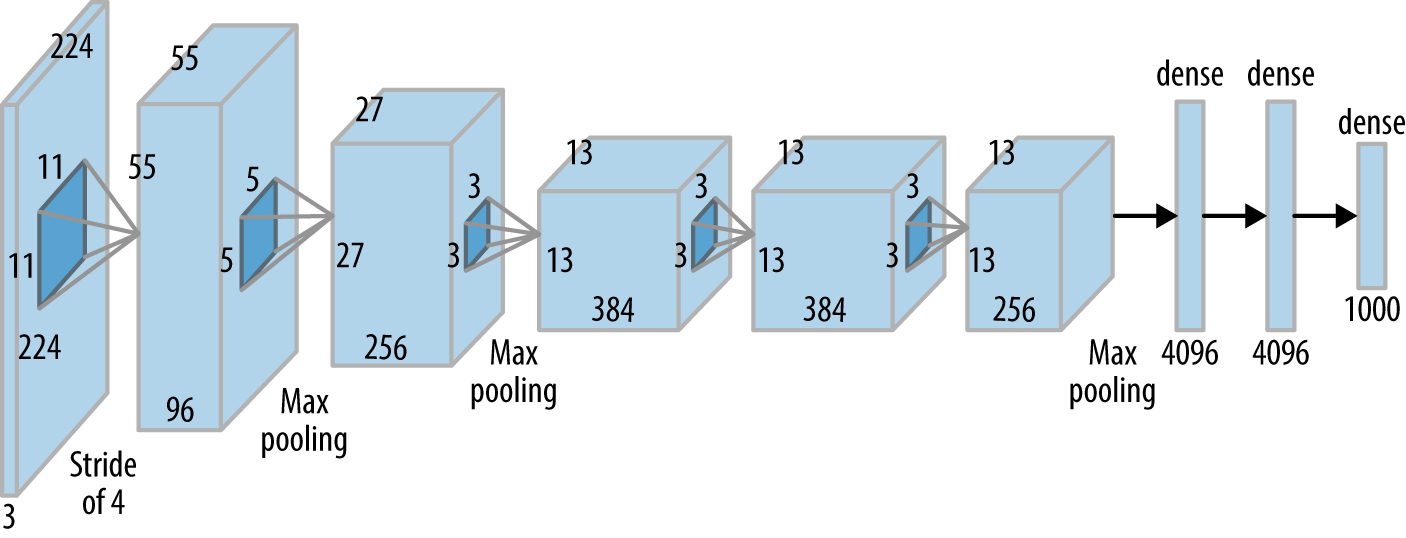

---
### VGG-16
The first new architecture that we tested was the **VGG-16** architecture. This architecture looks a lot like the AlexNet architecture, there are only some small differences in the size of the convolutional layers. The output size of these layers is 7 * 7 * 512. Which is bigger, the expected obtained accuracy was higher than the AlexNet, since there is more information tranferred to the fully connected layers. After training for about 20 hours until the loss became stable, the results are as follow :  

*  Accuracy : 0.36
*  Accuracy with non-zero IoU: 0.51
*  Time per frame: 0.021 second/frame

It was expected to have an accuracy greater than the one in the paper, since VGG16 is supposed to be more perfomant on image classification, so give better extracted features. The training was done until convergence, so the training time shouldn't be a reason. The training dataset might be a reason, our model may not generalize as good as the paper's because our training set was smaller than the paper's. Or the reason can just be that VGG16 isn't fitted for this type of problem. 



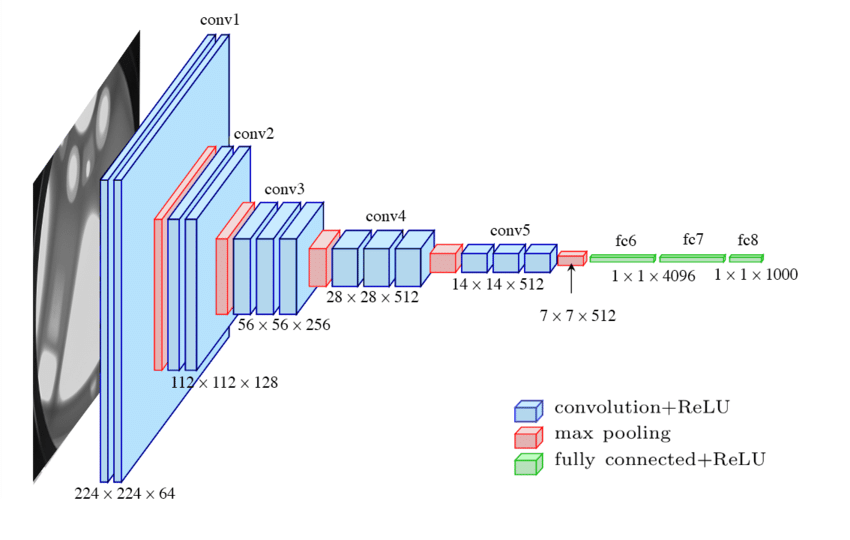

---
### ResNet-18 and ResNet-50
Another analysed architecture was with **ResNet-18** and **ResNet-50**. Those architectures perform very well on image classification tasks, as for VGG16 we expected very good results from it on our model. The particularity for the ResNet networks, is that it uses residual blocs. More precisely the ResNet-50 was expected to work better than the ResNet-18 architecture since it has more layers. After training both for about 20 hours, the loss was of about 120-220, L1 loss, it is much higher than the average training loss of VGG16, namely 35-55. The test results were as follows : 

* Accuracy : 0.03
* Accuracy with non-zero IoU: 0.21
* Time per frame: 0.013 seconds

The accuracies on the test data, were like the one on the training data, very poor. We think that this model is unable to learn information about the position of the object. These results aren't 0, just because the bounding box may sometimes randomly pass over the GT bounding box. We "think" that a reason for that can be found in the architecture of the ResNet networks. Usually for image classification architectures, there are first convolutional layers that perform feature extraction. The convolutional layers are followed by several fully connected layers, the AlexNet for example has three FCL. The Resnet only has 1 fully connected layer. This means that the features that are passed to the FCL are already processed, in order to do classification. Morover the input size of the FCL is 1024 and the outputsize is 1000, for a full imagenet classification. Such a small ratio input/output shows that the input features only contains information about the image class. No other information about the context or surroundings is passed, which made it very difficult to the model to learn things about the position of objects. 


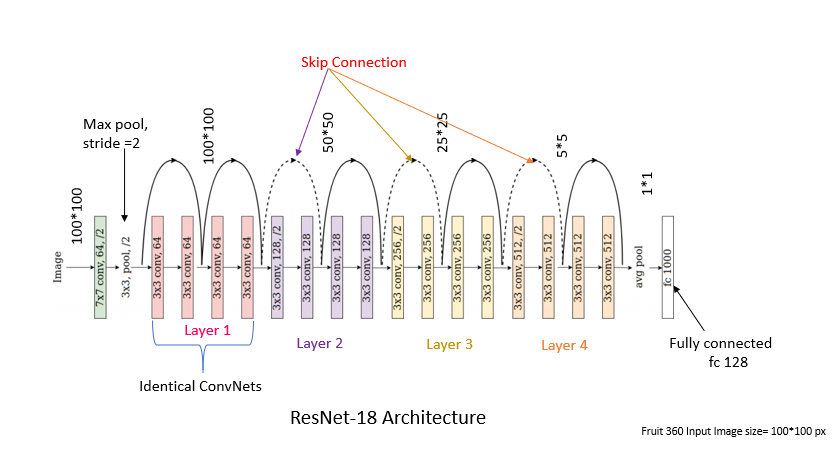

---
### MobileNet V2

The next network that is analysed, is the **MobileNet V2**. This model is in litterature often used for object detection, it has good performances and is suitable for mobile devices. It can easily run at 240 frames per second on an [iPhone X](https://machinethink.net/faster-neural-networks/). With the MobileNet V2 we try to achieve a faster network while having better results, than the paper's architecture. The output size of the convolutional layers of this network is 1280 * 7 * 7, those are then flattened before passing through the fully connected layers. After around 20 hours of training the results of this architecture were promissing : 


*  Accuracy : 0.46
*  Accuracy with non-zero IoU: 0.55
*  Time per frame: 0.020 second/frame

The accuracy are better than the paper's one (0.39) ! 

The speed of the network is worse than the one for alexnet, even if we know that alexnet is a much slower network than MobileNet. This may be because of the size of the first fully connected layer. The first fully connected layer with alexnet has as an input size of 6 * 6 * 256 * 2 and an output of 4096, this makes a total of 75 million weights. But it is nothing compared with the MobileNet, input size:  1280 * 7 * 7 * 2 and output size: 4096, this makes a total of 513 million weights. This huge difference might explain the different execution times. 

We explained that the bad results for the Resnet50 architecture was due to the fact that there was only one fully connected layer after the convolutional layers, when used for image classification. We argued that it meant that very little information was passed, apart of the objects label. For the MobileNet v2 there is also only one fully connected layer after the convolution layers. But the difference here is that the size of the output of the convolutinal layers of the MobileNet v2 is of 7 * 7 * 1280, compared to 2*512. This means that much more information is transfered, not only about the object's class. We think that this is the reason that explains the difference in performances between the Resnets and the MobileNet v2. 
 


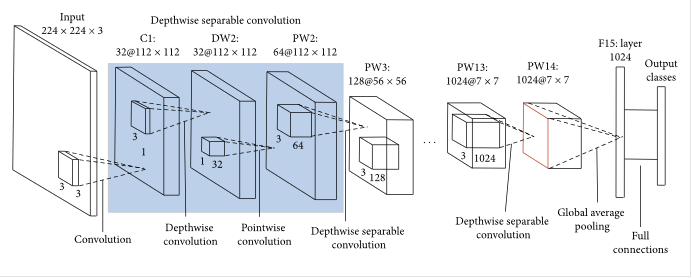

---
### MnasNet0.5
Finally a last network has been analysed namely the **mnasnet0.5**. This architecture has been chosen to perform better than the MobileNetV2, because it's classification performances are better and the latency is [1.8 times ](https://openaccess.thecvf.com/content_CVPR_2019/papers/Tan_MnasNet_Platform-Aware_Neural_Architecture_Search_for_Mobile_CVPR_2019_paper.pdf)faster. The model has been trained for around 16 hours until the losses were stable.

*  Accuracy: 0.52
*  Accuracy with non-zero IoU: 0.61
*  Time per frame: 0.014 seconds

The results in accuracy are better than the MobileNetV2 and much better than the AlexNet! 

The reduced latency time compared to the model with MobileNetV2, is explained by the smaller latency time. But still it has the same slow down as MobileNetv2, due to the big output size of the Mnasnet0.5. A figure that describes the MnasNet can be found bellow, unfortunately no more accurate and representative images can be found. 

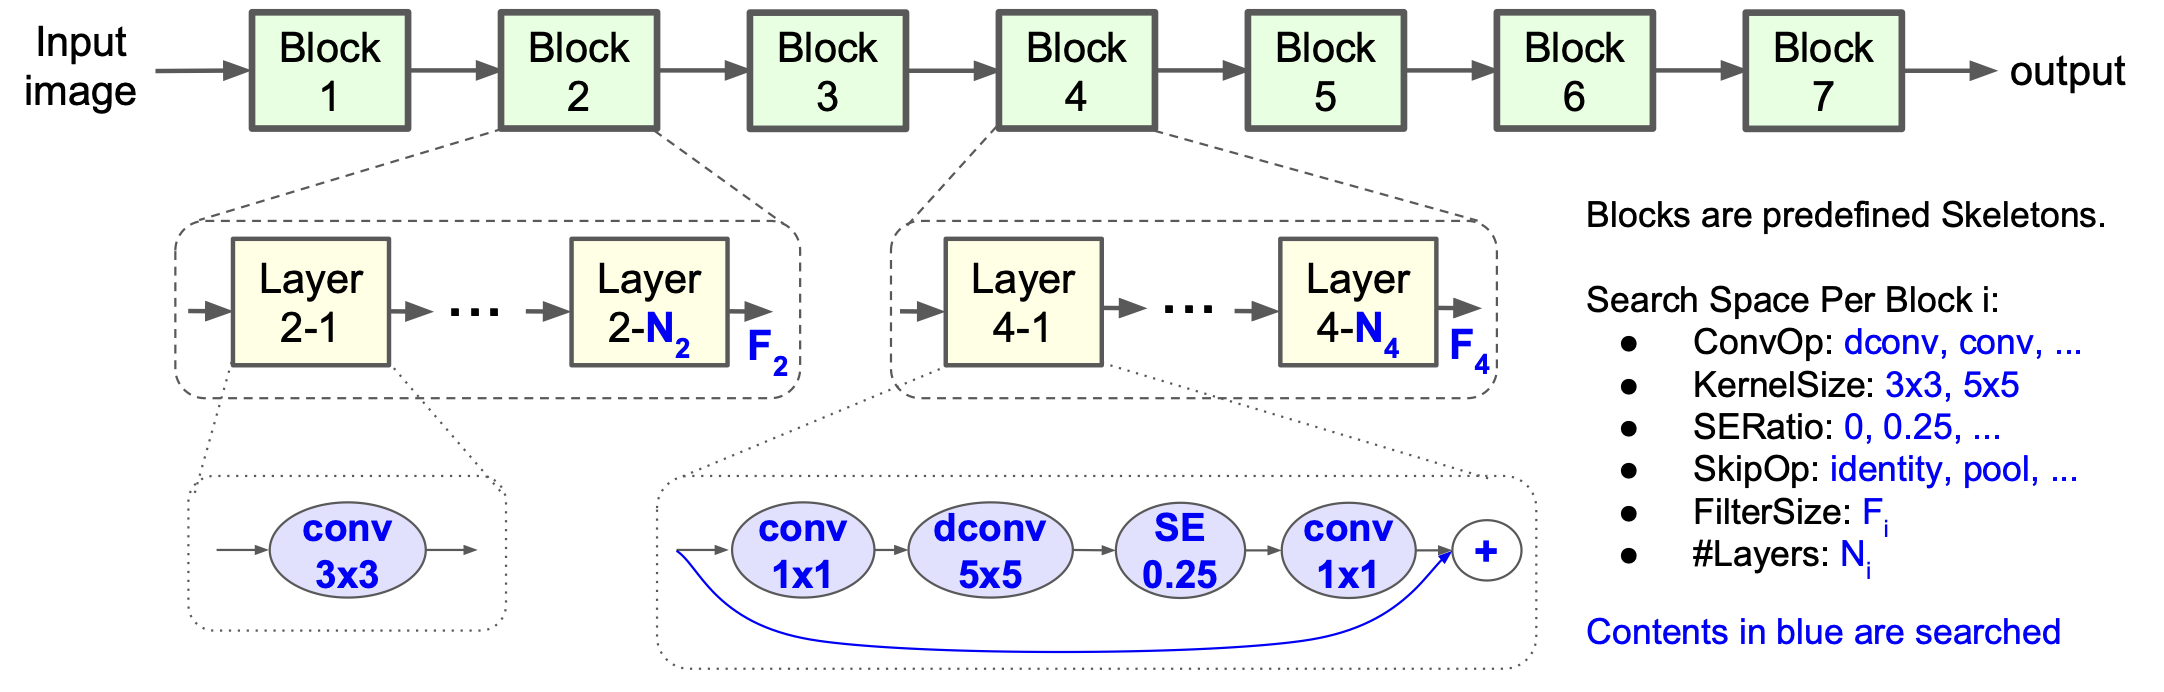

--- 
---
---
#Group connected layer



We found out above that it was possible to find a backbone architecture that gives better results than the original paper's architecture, namely the MnasNet0.5. But still we don't have a faster model. We noticed that the speed of the model decreased with the amount of weights in the first fully connected layer. A proof may be to notice that in theory the Mnasnet0.5 is [faster](https://openreview.net/pdf?id=Bygq-H9eg&source=post_page---------------------------) than the Resnet50, but in this model, Resnet is faster. This is due to the fact that the size of the first FCL, with resnet50, is much smaller than the one with mnasnet. 

We tried to solve this by decreasing the amount of parameters of the FCL by using a sort of **"[Group](https://www.researchgate.net/figure/Illustration-of-a-a-fully-connected-layer-b-group-connected-layer-c-our_fig1_343096380) connected layer"**. Usually this technique isn't used often in litterature, but we wanted to try it out. 

For the first part of the experiment, we used 20 groups, which divided the amount of weights for the first fully connected layer by 20, namely 25 million. We thought that all the output features did't had to be connected with each other, at least in the first layer. If they had to, there would have been the second FCL layer that would have connected them. 
The model was trained for about 10 hours, but it wasn't obtain good results at all. While testing we noticed that he just created huge bounding boxes, so the GT boundind box would find itself in it. 

We thought that the model was soo bad because the output features weren't able to communicate with each other at a higher stage. This is why we added a FCL of input and output size 4096, wich made a total of 4 FCL in the network. The results of this new network were also bad. This shows us how much the output nodes of the convolutions rely on each other. 

For these last two experiments we expected the computation time per frame would decrease with fewer weights, we actually increased it to around 0.025 seconds/frame. This wasn't expected. But actually it seems logical by looking at the values of the weights. Even if the normal FCL had much more weights, there were much more weights that were equal to 0. The pytorch linear layers might then have an efficient way of calculating the forward pass when dealing with weights of 0.  

Since there are a lot of zeros in the first FCL, **network pruning** might be a good solution to reduce the number of weights, thus increase the speed of the model. We didn't had time to try this improvement out, but it would be interesting to learn more and work with network pruning.


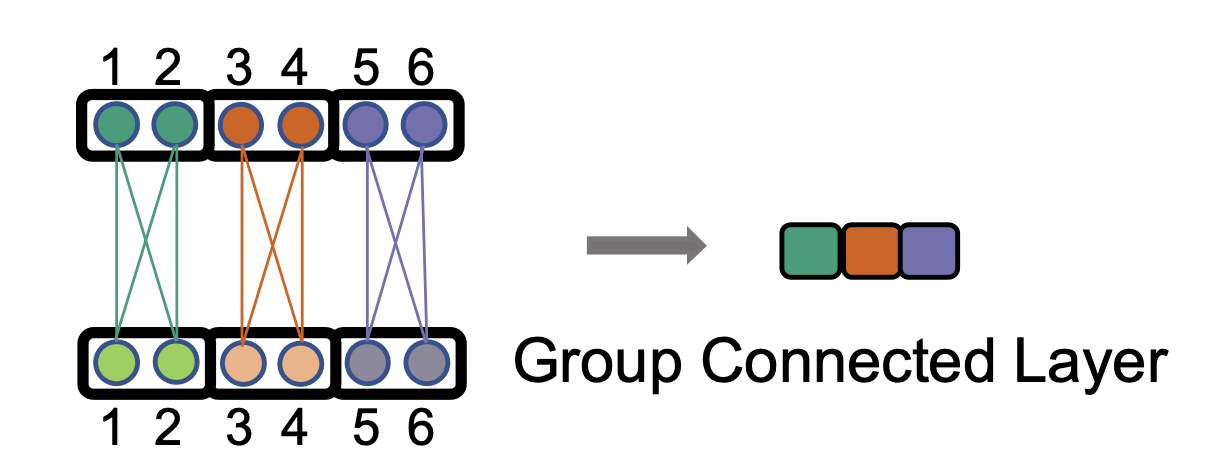

---
---
---
#Cross-correlation between the two frames

Another improvement that we want to try in order to increase the accuracy of the model would be adding a frame that represents the **cross correlation** between the first and the second frame. We believed that cross correlation between the two frame was able to represent displacement between the two frames. The cross correlation would then pass through the untrained alexnet, in order to find patterns and be able to discern for example the movements of the object, the background or the camera. Unfortunately we noticed that after 20 hours the model was converging very very slowly. This was probably not due to the architecture, but on the fact that the alexnet had to be trained again from scratch, since the features of a crosscorrelation matrix and an image are different. This would have taken days or week, if we wanted to train until convergence. The idea was then abandonned due to the training time. But in future research it might be interesting to try it. 

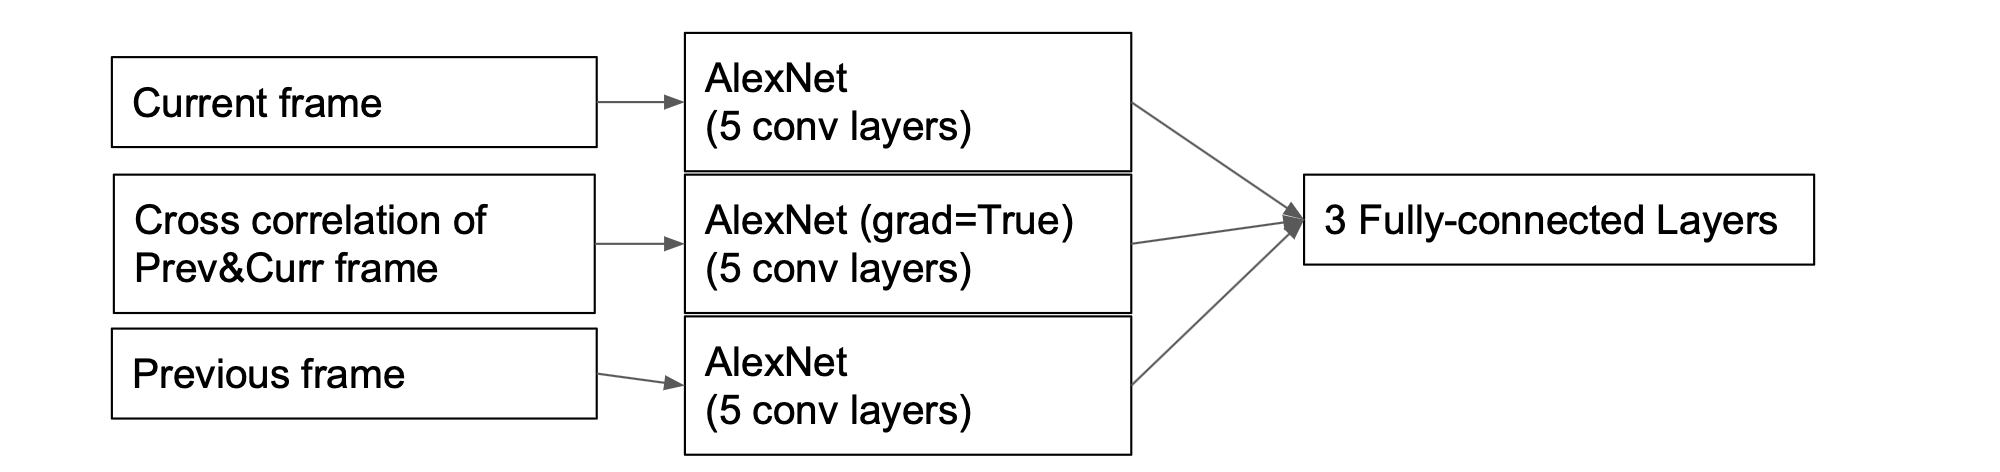

# 4. Loss functions


**Motivation & Research Question:** In the ablative analysis section of the paper (Held et al., 2016), it can be seen that the overall error caused by the loss function is the largest, which represents that the loss function has a very important influence on the performance of the whole network structure, including accuracy and robustness. In the paper, the authors only compared the L1 loss function and the L2 loss function. But the loss function of the bounding box has been improved a lot recently. Thus, we obtain a research question about the impact of different loss functions on the performance of Goturn neural network. Generally, the evolution route of loss functions in L1/L2 loss (before 2015) -> smooth L1 loss (2015) → IoU loss (2016) → GIoU loss (2019) → DIou loss (2019) → CIou loss (2019). This section explains their principles and improvements and implements them by writing our own loss function code according to this route. Loss function codes are attached in Appendix. Several videos that all the loss functions with Alexnet pre-trained network tested on the dataset coke are provided here: https://www.youtube.com/watch?v=iou6KwEftBI&list=PL7v7LiXAZ3MeUrUfQ9HLBQ0mP6qMZ2uvg

**Method & Training model analysis:**

---
---

**L1 loss & L2 loss:**

L1 loss function and L2 loss function are the one of the earliest and the most popular loss function for localization. They have the following forms and derivations. 

$$L_1 loss = |x|, \frac{dL_1(x)}{x}=\begin{cases}
1, \quad x \geq 0\\
0, \quad x < 0\\
\end{cases}$$ 
$$L_2 loss= x^2, \frac{dL_2(x)}{x}=2x$$

In the previous bounding box regression, L1 and L2 loss are often used, but there are existing some disadvantages of them. The derivative of L1 loss to $x$ is constant. Because $x$ represents the difference between the real value and the predicted value, if the learning rate remains unchanged, the loss function will fluctuate near the stable value and it is difficult to converge to higher accuracy in the later stage of training. For L2 loss, when the $x$ value of L2 loss is large, its derivative is very large, so it is unstable at the beginning of training. Thus, the bad result of L2 loss the authors got in the paper is probably because their tracking network or the bounding box regression have weak robustness for a large loss. So, we choose L1 loss as the baseline in this section and the following figure trained on ALOV300++ dataset shows the L1 loss curve.

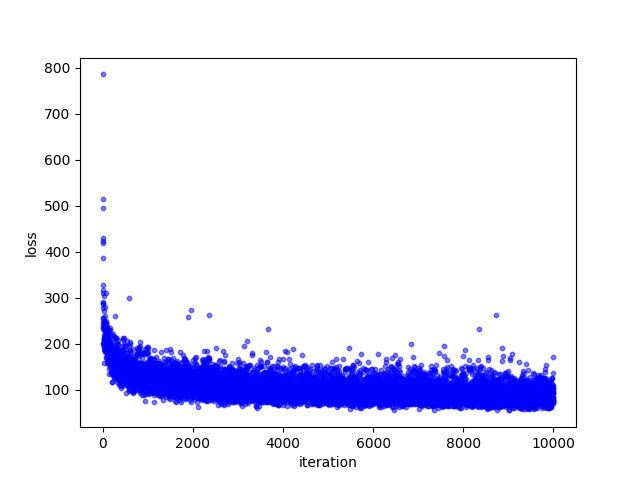
<center>L1 loss curve with 10000 iterations</center>

**SmoothL1 loss (Girshick, 2015):**

Aiming at the shortcomings of L1/L2 loss, smooth L1 is obtained after correction with the following forms. 

$$smooth_{L_1}(x) = \begin{cases}
0.5x^2, \quad if |x|<1\\
|x| - 0.5, \quad otherwise\\
\end{cases}$$
$$\frac{d_{smooth_{L_1}(x)}}{x}=\begin{cases}
x, \quad if|x|<1\\
\pm\ 1, \quad otherwise
\end{cases}$$

According to the above forms, it can be known that $smooth_{L_1}$ is L2 loss when $x$ is relatively large, while it is L1 loss when $x$ is relatively small. However, all the above three-loss calculate the loss of 4 points independently and then the final bbox loss is obtained by adding when they calculate the bbox loss of object tracking, which does not conform to the reality. Furthermore, the evaluation index of bbox in object tracking is IoU, which does not match the change of the above losses. The following figure training on ALOV300++ dataset shows the SmoothL1 loss curve.

We can see that SmoothL1 loss quickly converges to 100, while L1 loss converges to 200, which well corresponds to that SmoothL1 loss is L2 loss when the loss is relatively large, and it tends to obtain a smaller loss than L1 loss. 



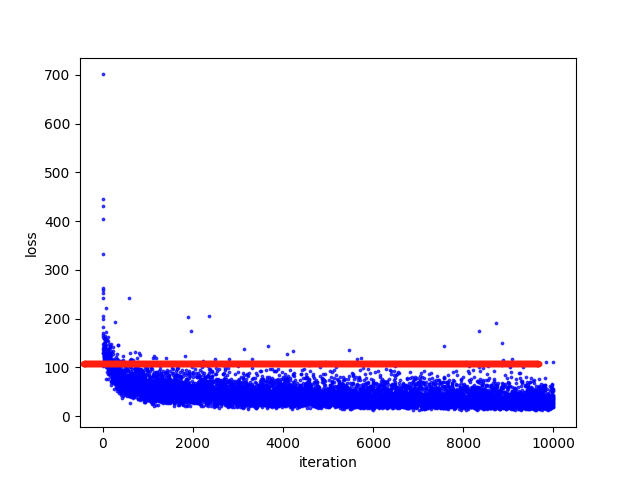
<center>SmoothL1 loss curve with 10000 iterations</center>

---
---
**IoU loss (Yu, Jiang, Wang, Cao & Huang, 2016):**

Also, aiming at the shortcomings of SmoothL1 loss, IoU loss is defined as follows.

$$IoU loss = -ln IoU(bbox_{gt}, bbox_{pred})$$

or even simplify as

$$IoU loss = 1 - IoU(bbox_{gt}, bbox_{pred})$$

The biggest improvement of IoU loss calculation is that it makes $x, y, w, h$ interrelated, and has scale invariance, which overcomes the shortcomings of SmoothL1 loss. However, IoU loss is not perfect either. When $IoU=0$, it can not reflect the distance between the two frames, so the loss function is not differentiable and IoU loss can not optimize the situation of two bbox disjoint. Moreover, assuming that the sizes of the prediction box and the target box are determined, as long as the intersection values of the two boxes are determined and their IoU values are the same, the IoU value can not reflect how the two boxes intersect. 

The following figure trained on ALOV300++ dataset shows the IoU loss curve. From this figure, the biggest difference between L1 loss and IoU loss is where the main body of IoU loss consists of two lines with different gradients, while L1 loss consists of a circular arc and a straight line. Also, notice that the loss value of IoU loss is quite smaller than that of L1 loss. It is obvious that IoU loss and L1 loss have two completely different convergence modes.


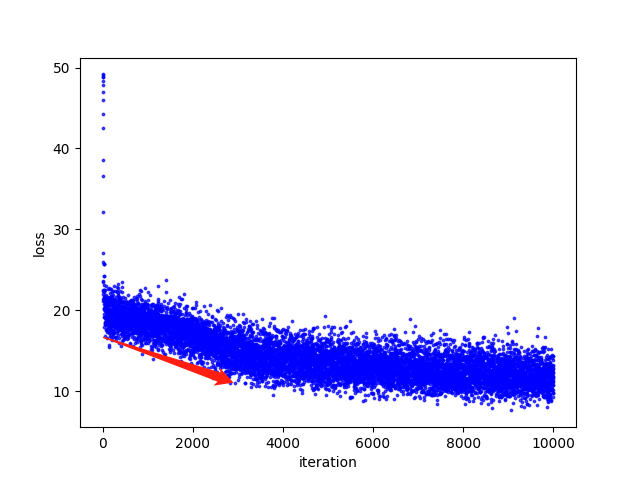
<center>IoU loss curve with 10000 iterations</center>

---
---
**GIoU loss (Rezatofighi et al., 2019):**

In order to solve the problem that IoU can not distinguish some intersecting cases. Thus, one paper proposed GIoU as the measurement index [Generalized intersection over union: A metric and a loss for bounding box regression]. 

$$GIoU=IoU-\frac{|C-(A \cup\ B)|}{|C|}$$

where $C$ is the circumscribed rectangle of $A$ and $B$. Subtract the union of a and $B$ by $C$ to get a value, and then subtract the IOU of $A$ and $B$ to get the GIoU value. It can be seen that:

The range of GIoU is $[-1,1]$, the maximum value is $1$ when the two frames overlap, and the minimum value is $-1$ when the two frames are infinite;

Different from IoU only focusing on overlapping areas, GIou not only focuses on overlapping areas but also focuses on other non-overlapping areas, which can better reflect the coincidence degree of the two.

Similarly to IoU loss, GIoU can be defined as:

$$GIoU loss = 1 - GIoU$$

However, when the prediction box is completely wrapped by the target box, the values of IoU and GIoU are the same. At this time, GIoU degenerates to IoU and its relative position cannot be distinguished. The following figure trained on ALOV300++ dataset shows the GIoU loss curve. It is clearly seen that GIoU loss not only keeps the features of IoU loss, including two lines with different gradients and the scale of loss value but also includes the features of L1 loss, such as a circular arc and a straight line. Therefore, it can have a reasonable hypothesis that GIou loss may both have the disadvantages and advantages of IoU loss and L1 loss.

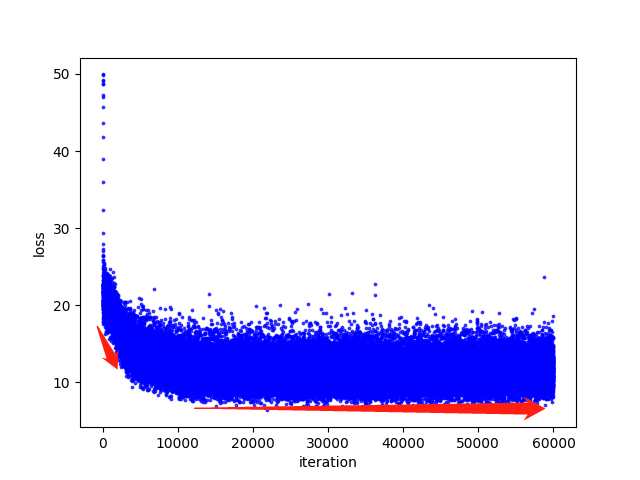
<center>GIoU loss curve with 60000 iterations</center>

---
---
**DIoU loss & CIoU loss (Zheng et al., 2020):**
To solve the shortcomings of IoU loss and GIoU loss, three important geometric factors of bounding box regression, overlapping area, center distance, and aspect ratio are proposed [reference: Distance-IoU Loss: Faster and Better Learning for Bounding Box Regression]. DIoU is to add the normalized distance of the center point on the basis of IoU, so it can better express the distance between two boxes. The penalty is set as:

$$R_{DIoU}= \frac{\rho ^2(b_{pred},b_{gt})}{c^2}$$

where $b_{pred}$ and $b_{gt}$ indicate the center point of the bounding box, and $\rho$ represents the Euclidean distance, $c$ is the diagonal distance of the smallest circumscribed rectangle. Therefore, DIoU loss is defined as:

$$DIoU loss =1 - IoU +R_{DIoU}$$

However, DIoU does not contain the aspect ratio. The following figure trained on ALOV300++ dataset shows the DIoU loss curve. Obviously, the curve of DIoU loss is very similar to that of IoU loss, which means that the penalty does not have a noticeable impact compared with IoU loss, at least on this training dataset. Therefore, we should see a similar performance of these two loss functions.


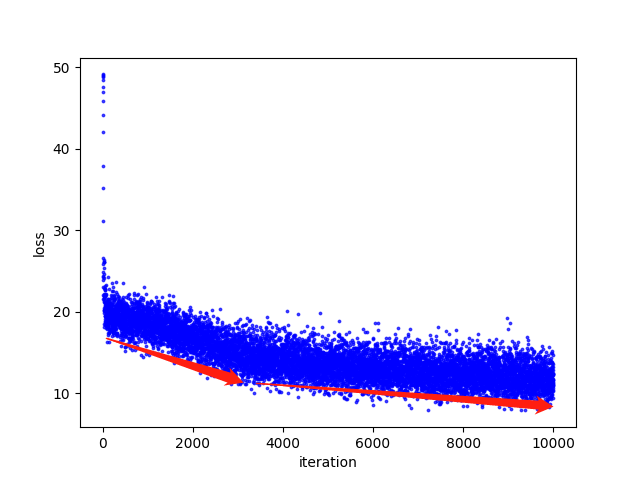
<center>DIoU loss curve with 10000 iterations</center>

---
---
So CIoU adds the aspect ratio influence factor $\alpha v$ and combines it to the penalty [reference: Distance-IoU Loss: Faster and Better Learning for Bounding Box Regression], based on DIoU. 

$$R_{CIoU} = \frac{\rho ^2(b_{pred},b_{gt})}{c^2} + \alpha v$$

where $v$ is used to measure the consistency of the aspect ratio, and $\alpha$  is used to balance the value $v$, which are set as:

$$\alpha = \frac{v}{(1-IoU)+v}$$
$$v = \frac{4}{\pi ^2}(arctan \frac{w^{gt}}{h^gt} -arctan \frac{w}{h})^2$$

Therefore, CIoU loss is defined as:

$$CIoU loss = 1- IoU +R_{CIoU}$$

However, $v$ is too complicated to measure the aspect ratio, which slows down the convergence rate. Moreover, we also find the loss collapse during training. The following two figures trained on ALOV300++ dataset show the CIoU loss curve and loss collapse. It is observed that CIoU loss curve is quite different from the other loss function in the scale of loss value but similar to the L1 loss curve in the shape. Based on the previous analysis, it is easy to obtain the difference between DIoU and CIoU is brought by $\alpha v$, and $\alpha v$ plays a decisive role. And the loss collapse is probably because the scale of loss value is too large, and the optimizer suddenly jumps to a bad position.



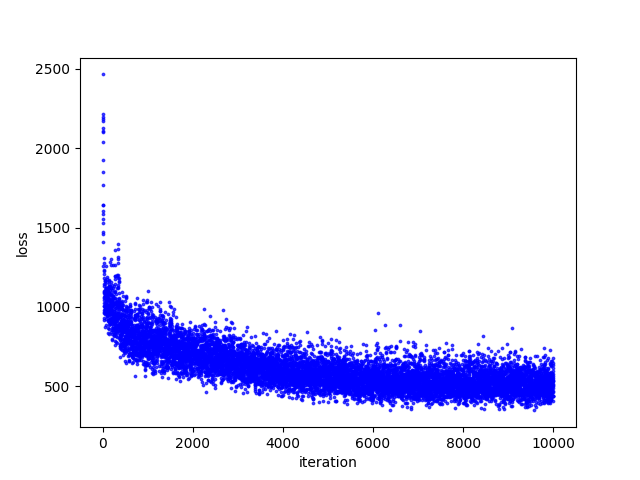
<center>CIoU loss curve with 10000 iterations</center>



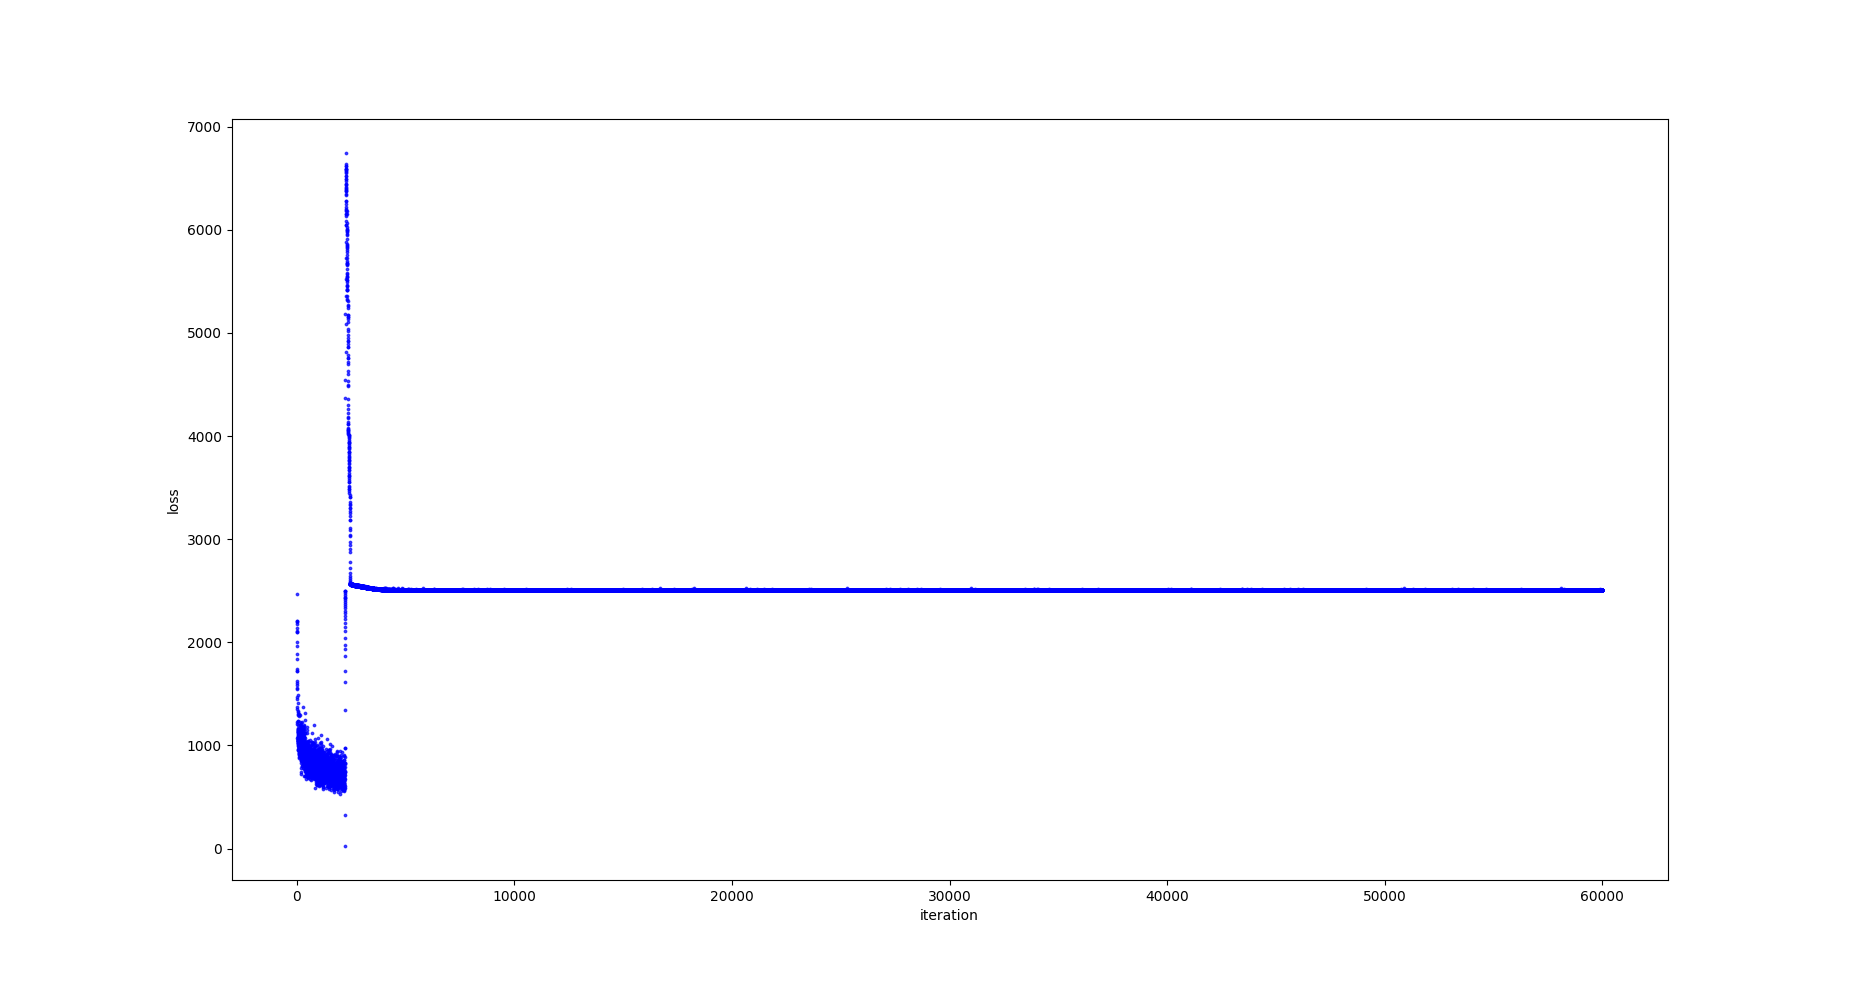
<center>CIoU loss collapse</center>

---
---
**Experiment & Result Analysis:**

To test the performance of different loss functions, we implement the above loss functions with several numbers of iterations on eight randomly selected class datasets in OTB, including Boy, Car, Basketball, Bird, Bolt, Skiing, Girl, Couple. The following figure shows the average IoU accuracy of different loss functions with different iterations on eight class datasets.


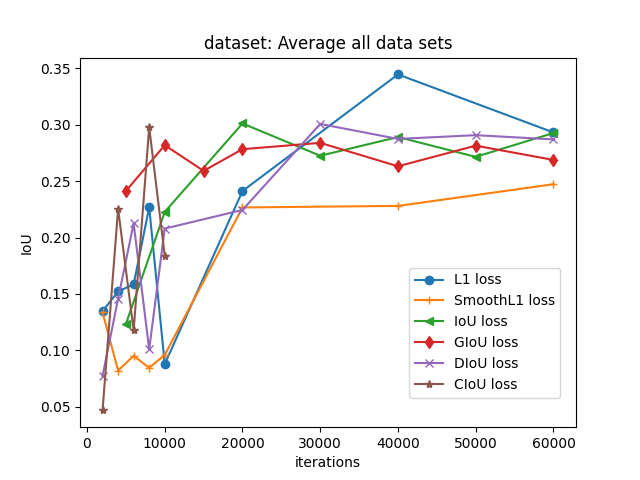


<center>The average IoU accuracy of six loss functions with different iterations on eight class datasets</center>

With regard to the previous hypotheses, for L1 loss and SmoothL1 loss, SmoothL1 loss does not work well as we thought. It seems that the small loss value and its mismatched iterations prevent Goturn from achieving higher accuracy. Basically, it is caused by SmoothL1 loss when it is L2 loss. Moreover, IoU loss has a completely different curve, which gradually increases and keeps stable at the late stage. And then, for GIoU loss, it can be seen that it is the most stable and the fastest convergent. However, its peak accuracy is slightly lower than L1 loss and IoU loss. As for DIoU loss, it does have a similar performance with IoU loss, except for the early fluctuation. And CIoU loss has the large fluctuation feature of L1 loss, and it is probably caused by the big loss value. 

Overall, most of our hypothesizes are confirmed. SmoothL1 loss and CIoU loss have the worst performance among these eight class datasets. For SmoothL1 loss, we can see that it fails to converge quickly in the early stage, which should be its advantage compared with L1 loss. Besides, the final IoU accuracy of SmoothL1 loss has a considerable gap with L1 loss. Apart from L1 loss, CIoU loss shows large convergence instability and also obsessed with loss collapse problem on the training dataset. Thus, it also should not be considered as a good loss function in this blog. Furthermore, DIoU loss has neither the fastest convergency rate and the stable convergency of GIoU loss, nor the highest IoU accuracy of L1 loss, nor the best overall performance of IoU loss. Thus, the relatively best loss functions are only L1 loss, IoU loss, and GIoU loss, which are worth further study. But why the loss value has this big effect on performance and the latest loss functions do not achieve the performance they claimed? Our assumption is that it is because the weights of the pre-trained model are fixed, and we are only training the weights of its fully-connected layers. The loss value and the loss functions have mismatched problems with the fully-connected layers. This is another interesting research question for further studying.

# 5. Combined Kalman filter with Goturn


Because of the time limitation and the immature idea, I do not have time to provide the formal and completed manuscript but the hand-writing draft. But the main idea is that the crop center of the frame $t+1$ is the same as that of the frame $t$, which is unreasonable and not use the spatiotemporal information of two frames. Therefore, the Kalman filter is a typical filter that depends on the spatiotemporal information and can move the crop center properly. Here is my draft solution which just an idea at the moment. 

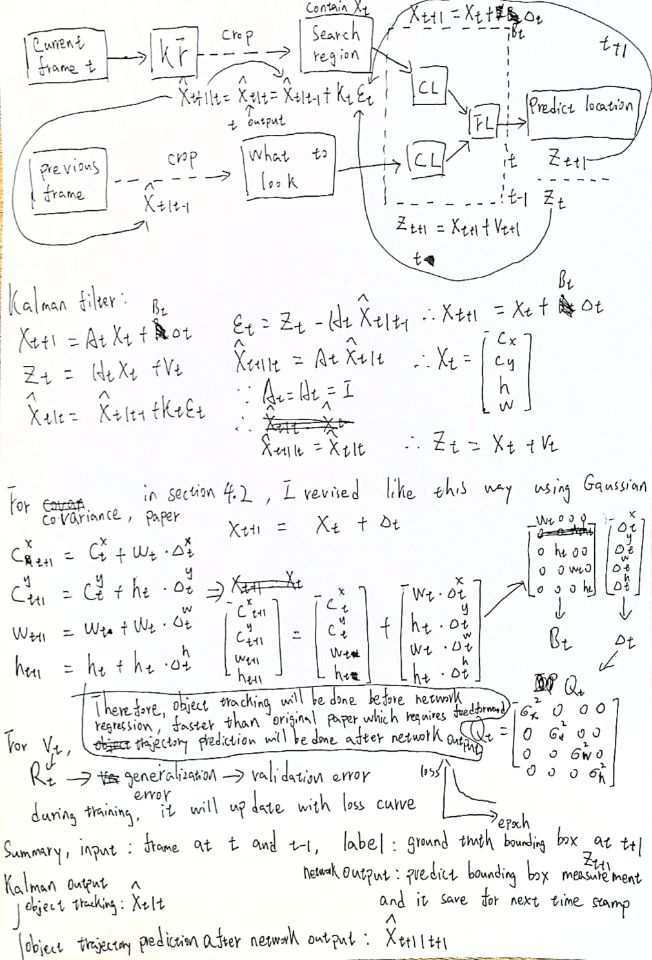

# 6. Combined 

In this section we will present a combination of the chosen loss function and the optimal backbone architecture. The loss function that has been chosen is the **IoU**, because it has a relative good performance on the original architecture and it converges relatively fast. The chosen backbone architecture that does feature extraction is the one that performs much better on the original architecture, namely the **MnasNet0.5**. This one is chosen because of it's very good performances. 

The training for this new model has been done during around 20 hours, for about 150000 iterations, until convergence. We expected the new network's test accuracy to converge a bit more slowly than the original one, with alexnet, because it has much more parameters to learn. 
We expected also that the accuracy would increase until convergence, and that the final accuracy would be approximately the same as the results of the network with Mnasnet0.5 with a L1 loss function. But the results we got weren't expected at all! 


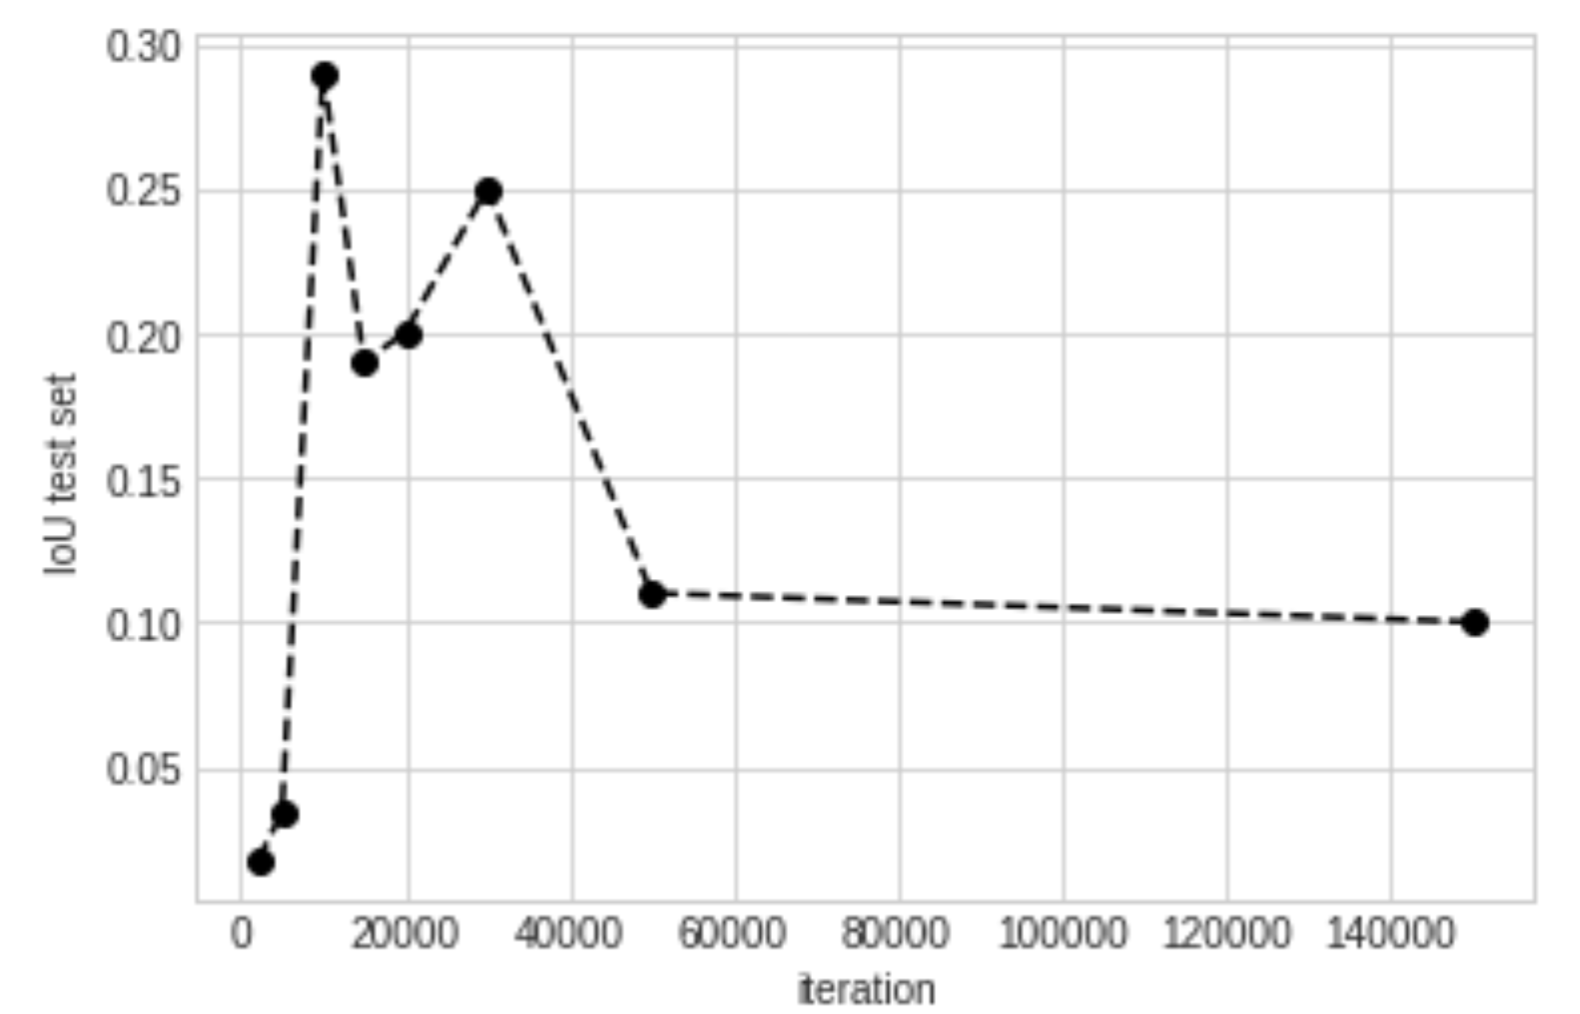

Something very strange happened during this training. The test accuracy increased very fast, until it's maximum at around 10k iterations. Then the accuracy would decrease until 50k iterations, where after that it remained stable, with a IoU of ±0.11. This is strange because we expected that it would only increase and then remain stable. Now it seems that the test accuracy increased until it reaches it's maximum, and then it overfits the training data. But the fact that the overfitting is the reason for this suddon drop is also strange. First of all because the drop is very fast and very deep. Then because when we trained the this network with the L1 loss, we didn't experienced overfitting and certainly not that pronounced. 

Maybe the model isn't overfitting, but it is just that the training wasn't stable, and that it collapsed. It would have been interesting to try to find out what the reasons are of this sudden drop in accuracy and if there would be a better alternative to this loss function. But we didn't had time to do it unfortunately.  

#7. Videos

Several videos that all the loss functions with Alexnet pre-trained network tested on the dataset coke are provided here: https://www.youtube.com/watch?v=iou6KwEftBI&list=PL7v7LiXAZ3MeUrUfQ9HLBQ0mP6qMZ2uvg

Two videos that L1 loss function and IoU loss function with MnasNet0.5 pre-trained network tested on the dataset coke are provided here: https://www.youtube.com/watch?v=KRVZxa4xJ80&list=PL7v7LiXAZ3MexHFPk-1GoGjbhNkF9nhdX

# 8. Conclusion


Overall, we focussed on mainly on two topics. The firstly we found out that the current model could be improved by changing the backbone architecture of the model, with the mnasnet0.5. The results with this model outperformed by 33% the original network accuracy. Then also analysed the training of the original network with different loss functions, we found out that the L1 loss, IoU loss and GIoU loss have a good and similar performance for the training of this model. Finally we wanted to combine results of the optimal backbone architecture and the best loss function, unfortunatley we found out that the training wasn't stable and that the test accuracy would collapse after 10-15k iterations. By the sake of time we didn't had time to investigate in details the reasons for this collapse in accuracy, but it would be an interesting thing to analyse in further research. 

Aymar found this project very intersting, he learned a lot about how actually to work with pretrained models to do feature extractions. Yigen liked a lot too this assignement, he leaned to manipulate loss functions very well and to understand their functionning. 

#9. Work distribution

We didn't knew each other before this project, we learned to know each other on zoom. Yigen is Chinese and Aymar is Belgian, both for their bachelor we didn't had to occasion to speak a lot of english. The communication between us was very difficult, due to our both respective accents. This is why for this project we did both our parts separetely, by keeping each other sometimes up to date about our advancements, ideas...
For the report and research:
Yigen did the entire introduction (1), the loss functions with analysis(4), the Combined Kalman with goturn (5) and finally the videos (7).
Aymar did the entire section of the architecture (2), the pretrained architectures, the group connected layers, the correlation between the two frames (3) and the combined (6).   

# Reference

Held, D., Thrun, S., & Savarese, S. (2016, October). Learning to track at 100 fps with deep regression networks. In European conference on computer vision (pp. 749-765). Springer, Cham.

Girshick, R. (2015). Fast r-cnn. In Proceedings of the IEEE international conference on computer vision (pp. 1440-1448).

Yu, J., Jiang, Y., Wang, Z., Cao, Z., & Huang, T. (2016, October). Unitbox: An advanced object detection network. In Proceedings of the 24th ACM international conference on Multimedia (pp. 516-520).

Rezatofighi, H., Tsoi, N., Gwak, J., Sadeghian, A., Reid, I., & Savarese, S. (2019). Generalized intersection over union: A metric and a loss for bounding box regression. In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (pp. 658-666).

Zheng, Z., Wang, P., Liu, W., Li, J., Ye, R., & Ren, D. (2020, April). Distance-IoU loss: Faster and better learning for bounding box regression. In Proceedings of the AAAI Conference on Artificial Intelligence (Vol. 34, No. 07, pp. 12993-13000).

# Appendix

## Code for reproduction


A connection to the account of aymdeberg@gmail.com needs to be done before doing anything, because the data and the pretrained models are needed in order to the tests, training... Then depending on the version of the model you want to train, evaluate or demonstrate you need to change the github code accoringly. The github code can be found for aymar's part here: https://github.com/debrouchovea/ReproduceGoturn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


For **training** you need to be sure that the pretrained model you use is already implemented on github (just need to change the comments in the file)

In [ ]:
!git clone https://github.com/debrouchovea/ReproduceGoturn.git
!python ReproduceGoturn/src/train.py  -d '/content/drive/My Drive/Goturnreproduce/data/' --save-freq 5000 -s '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnetv3/'

To **evaluate the speed** of an iteration per frame you need to run the code below. The results can be found in the folder 'Goturnreproduce/ *name of model* results'. If you want to change the tested model path, or result saving path you need to change the repistory accoringly in the evaluate.py on github. 

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib notebook
!pip install --upgrade got10k
!git clone https://github.com/debrouchovea/ReproduceGoturn.git
!python ReproduceGoturn/src/evaluate.py

In order to **test** the accuracy of a model, the github code needs first to be ajusted to the model you want to train. And then the pretrained version of the chosen accordingly. 

In [ ]:
!git clone https://github.com/debrouchovea/ReproduceGoturn.git
print('Basketball')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Basketball' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Bolt')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Bolt' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Boy')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Boy' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Car4')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Car4' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('CarDark')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/CarDark' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('CarScale')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/CarScale' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Coke')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Coke' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Couple')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Couple' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Crossing')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Crossing' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('David')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/David' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('David2')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/David2' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('David3')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/David3' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Deer')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Deer' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Dog1')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Dog1' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Doll')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Doll' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('Dudek')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/Dudek' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('FaceOcc1')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/FaceOcc1' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'

print('FaceOcc2')
!python ReproduceGoturn/src/demo.py -w '/content/drive/My Drive/Goturnreproduce/Checkpoints/mnasnet/model_itr_105000_loss_49.697.pth.tar' -d '/content/drive/My Drive/Goturnreproduce/DataDemo/OTB/FaceOcc2' -s '/content/drive/My Drive/Goturnreproduce/DataDemo/Results'


fatal: destination path 'ReproduceGoturn' already exists and is not an empty directory.
Basketball
tcmalloc: large alloc 2055208960 bytes == 0x56503c51a000 @  0x7fabd6ab3b6b 0x7fabd6ad3379 0x7fab831cc25e 0x7fab831cd9d2 0x7fabbfeb08e6 0x7fabc0312dd9 0x7fabc081d77a 0x7fabc07e8ef9 0x7fabc079f657 0x7fabc0643929 0x7fabd200fc07 0x7fabd2011584 0x7fabd1dbbd0a 0x5650367b6c65 0x565036777462 0x5650367eafd5 0x5650367e57ad 0x565036778a81 0x5650367b9d79 0x5650367b6cc4 0x565036777462 0x5650367eafd5 0x5650367e57ad 0x565036778a81 0x5650367b9d79 0x5650367b6cc4 0x565036777462 0x5650367ea715 0x5650367e57ad 0x565036778a81 0x5650367b9d79
tcmalloc: large alloc 2055208960 bytes == 0x5650bed1a000 @  0x7fabd6ab3b6b 0x7fabd6ad3379 0x7fab831cc25e 0x7fab831cd9d2 0x7fabc11f6e7d 0x7fabd1df1120 0x7fabd1a2fbd9 0x5650367778a8 0x5650367eafd5 0x5650367e57ad 0x5650367783ea 0x5650367e63b5 0x5650367e57ad 0x565036778003 0x565036777b09 0x5650368bf28d 0x56503682e1db 0x565036776bb1 0x565036867fed 0x5650367ea988 0x5650367e57ad 0

## Code for loss functions

If you want to reproduce or use the loss function code, you can git clone https://github.com/debrouchovea/ReproduceGoturn.git, and replace the corresponding files with the files in "Egen's code for loss functions and video-20210616T153939Z-001.zip". There are clear comment about switching the loss functions. Or you can copy and add the following codes to train.py.

In [ ]:
# -----------------------------------
#This part is used to create different loss functions

#This function is used to output Interction area and Union area, and the maximum and the minimum value of x and y
def Interction_Union(outputs, targets):
	#outputs = [x, y, w, h], [50,4], the form of output
	width_o = outputs[:, 2]
	width_t = targets[:, 2]
	height_o = outputs[:, 3]
	height_t = targets[:, 3]

	x_max = torch.max(torch.stack((outputs[:,0]+outputs[:, 2]/2, targets[:,0]+targets[:, 2]/2), 1), 1)[0]
	x_min = torch.min(torch.stack((outputs[:,0]-outputs[:, 2]/2, targets[:,0]-targets[:, 2]/2), 1), 1)[0]
	y_max = torch.max(torch.stack((outputs[:,1]+outputs[:, 3]/2, targets[:,1]+targets[:, 3]/2), 1), 1)[0]
	y_min = torch.min(torch.stack((outputs[:,1]-outputs[:, 3]/2, targets[:,1]-targets[:, 3]/2), 1), 1)[0]

	Area_o = torch.mul(width_o, height_o)
	Area_t = torch.mul(width_t, height_t)

	Inter_w = torch.add(width_o, width_t).sub(x_max.sub(x_min))
	Inter_t = torch.add(height_o, height_t).sub(y_max.sub(y_min))
		
	Inter = torch.mul(Inter_w, Inter_t)
	zeros = torch.zeros_like(Inter)
	Inter = torch.where(Inter < 0, zeros, Inter)
		
	Union = torch.add(Area_o, Area_t).sub(Inter)	
	
	return Inter, Union, x_max, x_min, y_max, y_min


# Output the center		
def Center_points(outputs, targets):
	
	x_o = outputs[:,0]
	y_o = outputs[:,1]
	x_t = targets[:,0]
	y_t = targets[:,1]

	return x_o, y_o, x_t, y_t


# The IoU loss function
class IoU_loss(torch.nn.Module):
	def __init__(self):
		super().__init__()
	
	def forward(self, outputs, targets):

		Inter, Union, _, _, _, _ = Interction_Union(outputs, targets)
		zeros = torch.zeros_like(Inter)

		loss = torch.div(Inter, Union)
		
		loss = 1 - loss

		loss = torch.where(loss < 0, zeros, loss)

		
		return torch.sum(loss)


# The GIoU loss function
class GIoU_loss(torch.nn.Module):
	def __init__(self):
		super().__init__()
	
	def forward(self, outputs, targets):
		Inter, Union, x_max, x_min, y_max, y_min = Interction_Union(outputs, targets)

		IoU = torch.div(Inter, Union)

		C_width =  x_max.sub(x_min)
		C_height = y_max.sub(y_min)
		C = torch.mul(C_width, C_height)
		
		GIoU = IoU.sub(torch.div(C.sub(Union), C))
		
		ones = torch.ones_like(GIoU)
		
		loss = ones.sub(GIoU)
		zeros = torch.zeros_like(loss)
		loss = torch.where(loss < 0, zeros, loss)
		
		return torch.sum(loss)


# The DIoU loss function
class DIoU_loss(torch.nn.Module):
	def __init__(self):
		super().__init__()
	
	def forward(self, outputs, targets):
		Inter, Union, x_max, x_min, y_max, y_min = Interction_Union(outputs, targets)
		
		IoU = torch.div(Inter, Union)

		C_width =  x_max.sub(x_min)
		C_height = y_max.sub(y_min)
		C = torch.mul(C_width, C_height)

		x_o, y_o, x_t, y_t = Center_points(outputs, targets)
		dis = torch.add(torch.pow(x_o.sub(x_t), 2), torch.pow(y_o.sub(y_t), 2))
		R_DIoU = torch.div(dis, torch.pow(C, 2))

		ones = torch.ones_like(IoU)
		
		loss = torch.add(ones.sub(IoU), R_DIoU)
		zeros = torch.zeros_like(loss)
		loss = torch.where(loss < 0, zeros, loss)
		return torch.sum(loss)



# The CIoU loss function
class CIoU_loss(torch.nn.Module):
	def __init__(self):
		super().__init__()
	
	def forward(self, outputs, targets):

		Inter, Union, x_max, x_min, y_max, y_min = Interction_Union(outputs, targets)
		
		IoU = torch.div(Inter, Union)
	
		loss_DIoU = DIoU_loss().to(device)
		loss = loss_DIoU(outputs, targets)

		width_o = outputs[:, 2]
		width_t = targets[:, 2]
		height_o = outputs[:, 3]
		height_t = targets[:, 3]

		v = torch.pow(torch.arctan(torch.div(width_t, height_t)).sub(torch.arctan(torch.div(width_o, height_o))), 2)*4/(np.pi*np.pi)
		alpha = torch.div(v, (1 + v.sub(IoU)))
		R_CIoU = torch.mul(alpha, v)
		loss = torch.add(loss, R_CIoU)
		zeros = torch.zeros_like(loss)
		loss = torch.where(loss < 0, zeros, loss)
		return torch.sum(loss)
# -----------------------------------